## Parental Education and Marriage Rates:

Is there a relationship between the level of education and the percentage of couples being married when their child is born? As modern Social Science has led us to expect, the approximately 3.8 million births in the United States in 2018 clearly indicate that higher parental education is generally though not perfectly correlated with a higher rate of marriage.

**Dataset Compiled By:** National Center for Health Statistics

**Source:** https://www.kaggle.com/des137/us-births-2018

This dataset is too large to be hosted by GitHub. To run this code, please download the CSV file from the Kaggle link above. 

In [153]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [163]:
useful_cols = {"FEDUC", "MEDUC", "DMAR", "MBSTATE_REC"}
df = pd.read_csv("US_Births.csv", usecols=useful_cols, dtype = 
               {"FEDUC": "int", "MEDUC": "int", "MBSTATE_REC": "int"}, low_memory=False)

CDC Documentation
ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/DVS/natality/UserGuide2018-508.pdf

Remove the specific values that correspond to NaN for father's education (FEDUC), mother's education (MEDUC), the couple's marital status (DMAR), and whether the mother was born outside of the United States:

In [155]:
df = df[df.FEDUC != 9]
df = df[df.FEDUC != 0]

df = df[df.MEDUC != 9]
df = df[df.MEDUC != 0]

df = df[df.DMAR != 9]

df = df[df.MBSTATE_REC != 3]

To make the graph use percentages, set married to 100, not married to 0 and generate a pivot table:

In [156]:
df["DMAR"] = np.where(df['DMAR']==1, 100, 0)

In [157]:
table = df.pivot_table(index="FEDUC", columns="MEDUC",values="DMAR")

Set the education labels for the graph:

**Index:** 
1. N/A: Less than 8th grade
2. HS-: HS Dropout
3. HS: HS Diploma  
4. AA-: Some College
5. AA: Associates Degree
6. BA: Bachelor's Degrees
7. MA: Master’s degree
8. Ph.D.: Doctorate or Professional Degree

In [158]:
positions = np.arange(1,9)
positions
labels = ("N/A",
"HS-",  
"HS",  
"AA-",
"AA", 
"BA", 
"MA", 
"PhD")

Plot the Data using Seaborn's Heatmap: 

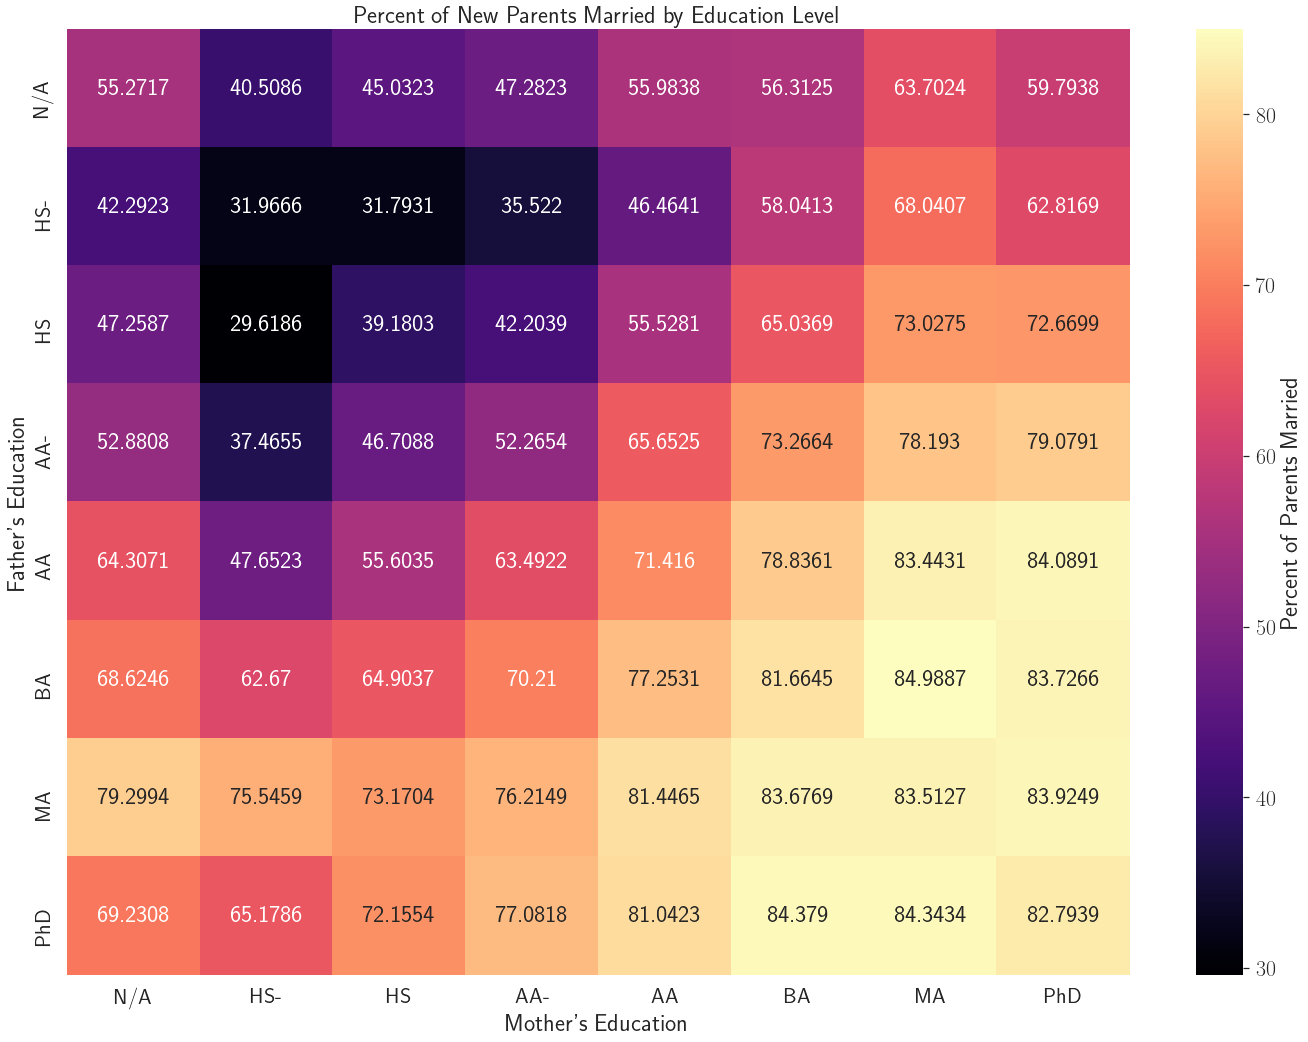

In [159]:
plt.rc('text', usetex=True)

sns.set(font_scale=2)
plt.subplots(figsize=(20,15))
sns.heatmap(table, annot=True, fmt="g", cmap='magma', cbar_kws={'label': 'Percent of Parents Married'})

plt.xticks(positions -0.5, labels)
plt.yticks(positions -0.5, labels)

plt.xlabel("Mother's Education", fontsize="medium")
plt.ylabel("Father's Education", fontsize="medium")
plt.title("Percent of New Parents Married by Education Level")
plt.tight_layout()
plt.savefig("percent_married.png", bbox_inches="tight", dpi=400)

There is a general trend that the rate of marriage is correlated with parental education. The clear exception to this general trend is when the mother's education is below 8th grade. Could it be possible that this is because most mothers with less than an 8th grade education were born outside of the US? 

In [160]:
df["MBSTATE_REC"] = np.where(df['MBSTATE_REC']==2, 100, 0)

In [161]:
nativity_table = df.pivot_table(index="MEDUC", values="MBSTATE_REC")

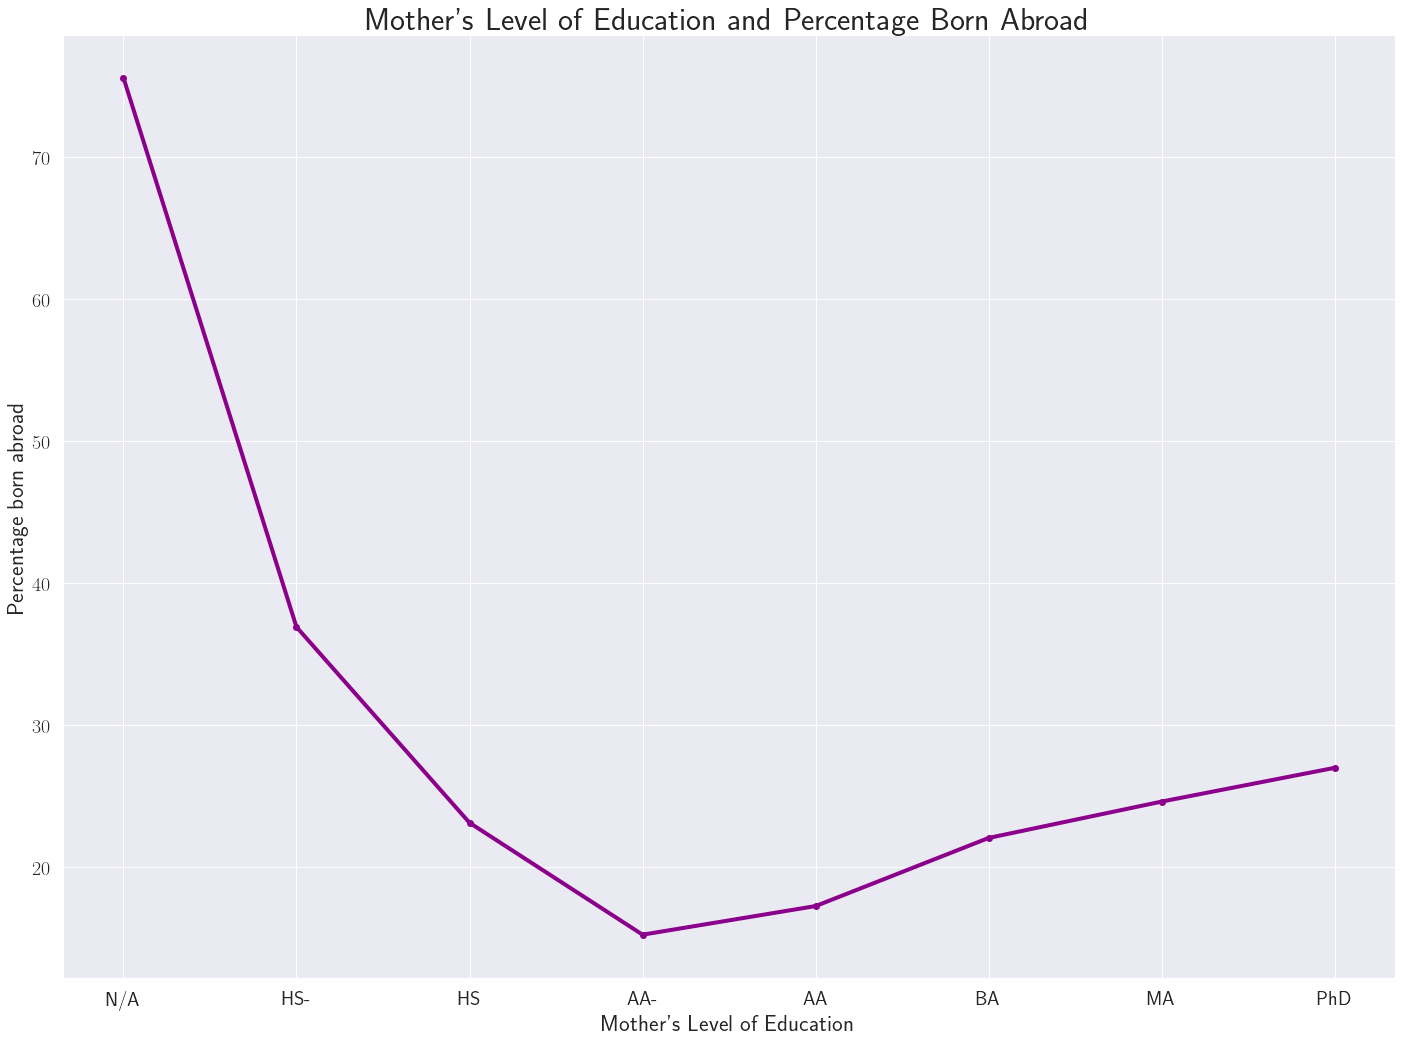

In [162]:
plt.rc('text', usetex=True)
plt.subplots(figsize=(20,15))
plt.style.use("seaborn")

plt.plot(labels, nativity_table.values, linewidth=4, color="darkmagenta", marker='o')
plt.xlabel("Mother's Level of Education", fontsize=23)
plt.ylabel("Percentage born abroad", fontsize=23)
plt.title("Mother's Level of Education and Percentage Born Abroad", fontsize=32)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("mothers_born_abroad.png", bbox_inches="tight", dpi=400)

This is indeed the case. Since mothers with less than an 8th grade are mostly born outside of the United States, they may have different attitudes toward marriage.  